In [22]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
response = requests.get("http://localhost:9090/air-quality-stations")

In [24]:
data = response.json()
print(data)

{'stations': [{'site_id': '031354b3-b6a2-403b-aae3-79e18f69c957', 'site_name': 'Footscray', 'latitude': -37.80266189575195, 'longitude': 144.8778076171875}, {'site_id': '032edf91-3cb9-42be-8ff3-70d3f56dba68', 'site_name': 'Morwell East', 'latitude': -38.229393005371094, 'longitude': 146.42445373535156}, {'site_id': '15b90658-97fe-42a4-8bb8-cfc5cc90cdc9', 'site_name': 'Point Cook', 'latitude': -37.92631530761719, 'longitude': 144.75669860839844}, {'site_id': '33f48fb3-f771-49e8-b554-0fcec8eb70bb', 'site_name': 'Morwell South', 'latitude': -38.23929214477539, 'longitude': 146.38729858398438}, {'site_id': '4246f120-80ff-44e5-9c94-ec5a16a7276e', 'site_name': 'Mildura', 'latitude': -34.19561004638672, 'longitude': 142.16160583496094}, {'site_id': '4afe6adc-cbac-4bf1-afbe-ff98d59564f9', 'site_name': 'Melbourne CBD', 'latitude': -37.807395935058594, 'longitude': 144.97000122070312}, {'site_id': '4c4e8933-a66b-4e76-b2c2-ad9bb56d8809', 'site_name': 'Altona North', 'latitude': -37.84412384033203

In [25]:
if response.status_code == 200:
    air_quality_stations_data = response.json()
    df_air_quality_stations = pd.DataFrame(air_quality_stations_data['stations'])
    
    # Define approximate latitude and longitude ranges for Melbourne
    melbourne_lat_range = (-38.1, -37.5)
    melbourne_lon_range = (144.5, 145.5)

    # Filter air quality stations in Melbourne
    melbourne_air_quality_stations = df_air_quality_stations[
        (df_air_quality_stations['latitude'] >= melbourne_lat_range[0]) & 
        (df_air_quality_stations['latitude'] <= melbourne_lat_range[1]) &
        (df_air_quality_stations['longitude'] >= melbourne_lon_range[0]) & 
        (df_air_quality_stations['longitude'] <= melbourne_lon_range[1])
    ]
    
    print("Melbourne Air Quality Stations:")
    print(melbourne_air_quality_stations[['site_id', 'site_name']])
else:
    print(f"Failed to retrieve air quality stations: {response.status_code}")
    print(response.text)

Melbourne Air Quality Stations:
                                 site_id      site_name
0   031354b3-b6a2-403b-aae3-79e18f69c957      Footscray
2   15b90658-97fe-42a4-8bb8-cfc5cc90cdc9     Point Cook
5   4afe6adc-cbac-4bf1-afbe-ff98d59564f9  Melbourne CBD
6   4c4e8933-a66b-4e76-b2c2-ad9bb56d8809   Altona North
9   69088979-01eb-4b48-9535-22b6d69421ec      Dandenong
11  77062cb7-3e3b-4984-b6d0-03dda76177f2       Box Hill
12  78dbc892-d9e9-490b-94a6-baf1ca72c36c       Brooklyn
15  9348c1f5-60c5-4c35-b4f1-1f0931ab1415    Mooroolbark
16  9a9f2a8f-e108-4ae6-b9d3-ec6fe25863b5     Kingsville
17  b2972c05-c6c6-4d50-94ad-7fa53722e9d0      Spotswood
19  c69ed768-34d2-4d72-86f3-088c250758a8     Alphington
20  d56ede8c-637a-41e9-a055-f53198e9456a       Brighton
21  ea40fbea-46ce-4acf-8f3e-eb76c26c712b         Melton
26  fd9971b2-130e-4163-b56c-a37beadc7846        Macleod


In [26]:
station_ids = {
    'Point Cook': '15b90658-97fe-42a4-8bb8-cfc5cc90cdc9',
    'Footscray': '031354b3-b6a2-403b-aae3-79e18f69c957'
}
year = 2024
month = 5

station_data_list = []

for station_name, station_id in station_ids.items():
    url = f"http://localhost:9090/air-quality-stations/{station_id}?year={year}&month={month}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        print(f"Data for {station_name}:")
        print(data)  # Print the JSON response to inspect its structure
        
        df_station_data = pd.DataFrame([data])  # Wrap data in a list to convert to DataFrame
        
        # Ensure 'date_filter' exists and extract 'start' date
        if 'date_filter' in data and 'start' in data['date_filter']:
            df_station_data['date'] = pd.to_datetime(data['date_filter']['start'])
        else:
            print(f"'date_filter' or 'start' not found in data for {station_name}")
            continue
        
        df_station_data['station_id'] = station_id
        df_station_data['station_name'] = station_name
        station_data_list.append(df_station_data)
    else:
        print(f"Failed to retrieve data for {station_name} (Station ID: {station_id}): {response.status_code}")
        print("Response content:")
        print(response.text)

Data for Point Cook:
{'max_pm25': 44.72999954223633, 'avg_pm25': 12.058895306531774, 'min_pm25': 3.9700000286102295, 'date_filter': {'start': '2024-05-01 00:00:00', 'end': '2024-05-31 23:59:59'}}
Data for Footscray:
{'max_pm25': 45.52000045776367, 'avg_pm25': 13.378361620471976, 'min_pm25': 1.0800000429153442, 'date_filter': {'start': '2024-05-01 00:00:00', 'end': '2024-05-31 23:59:59'}}


In [27]:
if station_data_list:
    df_stations_data = pd.concat(station_data_list)
    print(df_stations_data.head())
    print("Available Variables:")
    print(df_stations_data.columns)
else:
    print("No data retrieved for the specified stations.")

   max_pm25   avg_pm25  min_pm25  \
0     44.73  12.058895      3.97   
0     45.52  13.378362      1.08   

                                         date_filter       date  \
0  {'start': '2024-05-01 00:00:00', 'end': '2024-... 2024-05-01   
0  {'start': '2024-05-01 00:00:00', 'end': '2024-... 2024-05-01   

                             station_id station_name  
0  15b90658-97fe-42a4-8bb8-cfc5cc90cdc9   Point Cook  
0  031354b3-b6a2-403b-aae3-79e18f69c957    Footscray  
Available Variables:
Index(['max_pm25', 'avg_pm25', 'min_pm25', 'date_filter', 'date', 'station_id',
       'station_name'],
      dtype='object')


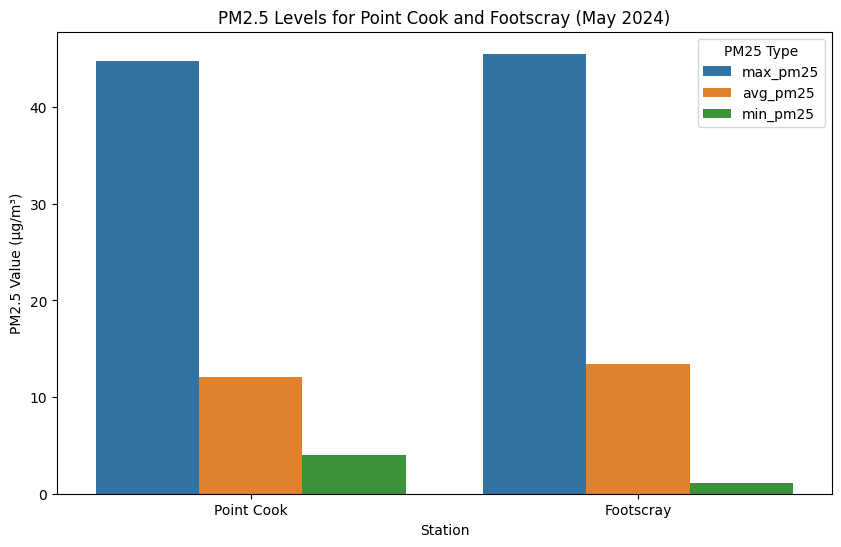

In [28]:
df_bar_chart = df_stations_data[['station_name', 'max_pm25', 'avg_pm25', 'min_pm25']]

df_bar_chart_melted = df_bar_chart.melt(id_vars=['station_name'], var_name='PM25 Type', value_name='PM25 Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='station_name', y='PM25 Value', hue='PM25 Type', data=df_bar_chart_melted)
plt.title('PM2.5 Levels for Point Cook and Footscray (May 2024)')
plt.xlabel('Station')
plt.ylabel('PM2.5 Value (µg/m³)')
plt.show()

In [29]:
df_stations_data['date'] = pd.to_datetime(df_stations_data['date'])

# Check the data types
print(df_stations_data.dtypes)

max_pm25               float64
avg_pm25               float64
min_pm25               float64
date_filter             object
date            datetime64[ns]
station_id              object
station_name            object
dtype: object


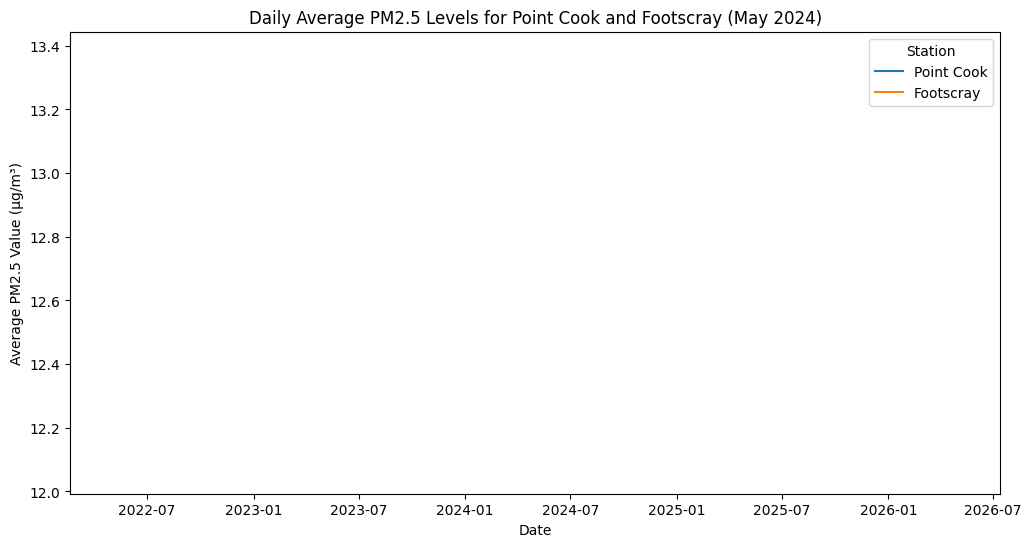

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_stations_data, x='date', y='avg_pm25', hue='station_name')
plt.title('Daily Average PM2.5 Levels for Point Cook and Footscray (May 2024)')
plt.xlabel('Date')
plt.ylabel('Average PM2.5 Value (µg/m³)')
plt.legend(title='Station')
plt.show()